In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0

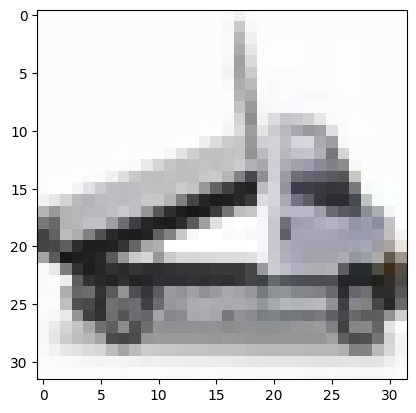

In [6]:
plt.imshow(X_train[3345])

In [7]:
y_train[3345]

array([9], dtype=uint8)

In [8]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(700, activation="relu"),
    BatchNormalization(),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dense(120, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax")
])

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.3293 - loss: 1.9024 - val_accuracy: 0.3711 - val_loss: 1.7335
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.4214 - loss: 1.6208 - val_accuracy: 0.3215 - val_loss: 1.9235
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4512 - loss: 1.5367 - val_accuracy: 0.4403 - val_loss: 1.5536
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4783 - loss: 1.4576 - val_accuracy: 0.4476 - val_loss: 1.5619
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4977 - loss: 1.4064 - val_accuracy: 0.4409 - val_loss: 1.6050
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.5161 - loss: 1.3527 - val_accuracy: 0.4934 - val_loss: 1.4242
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5316 - loss: 1.3129 - val_accuracy: 0.4572 - val_loss: 1.5316
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5465 -

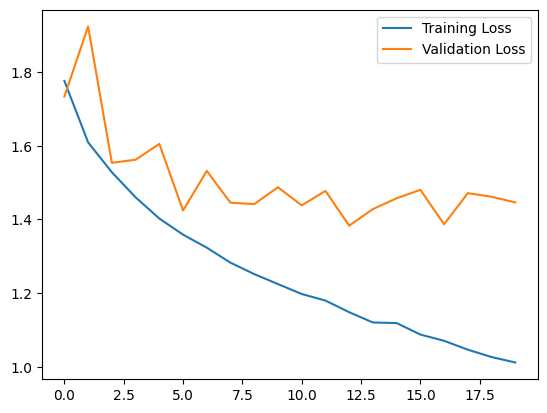

In [11]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

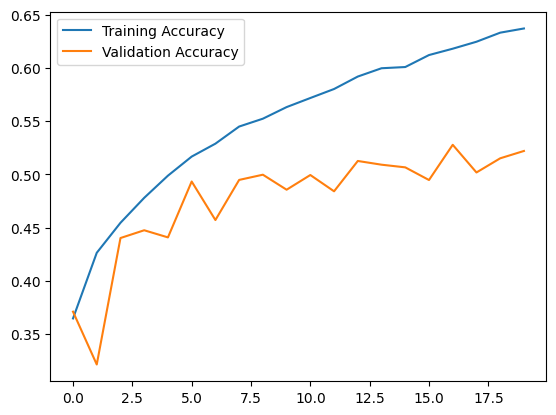

In [12]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [13]:
from PIL import Image

In [14]:
img = Image.open(r"C:\Users\LENOVO\Downloads\Spotted Deer.jpg")
img = img.resize((32,32))
img = np.array(img)
img = img/255.0

In [15]:
img.ravel()

array([0.4627451 , 0.36470588, 0.10196078, ..., 0.64313725, 0.45490196,
       0.23137255])

In [16]:
pred = model.predict(np.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


In [17]:
np.argmax(pred)

4

In [18]:
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]

In [19]:
classes[np.argmax(pred)]

'deer'

In [20]:
np.round(pred, decimals=3)

array([[0.022, 0.   , 0.092, 0.032, 0.695, 0.004, 0.137, 0.018, 0.   ,
        0.   ]], dtype=float32)